# Homework

> Note: sometimes your answer doesn't match one of 
> 
> the options exactly. That's fine. 
> 
> Select the option that's closest to your solution.
> 
> If it's exactly in between two options, select the higher value.


## Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash

```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-05 18:50:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 240.0.67.254
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|240.0.67.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-11-05 18:50:44 (6.95 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./car_fuel_efficiency.csv')

## Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [3]:
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [4]:
# Fill missing values with zeros.

df = df.fillna(0.0)

In [5]:
# Do train/validation/test split with 60%/20%/20% distribution. 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [8]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [9]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,180,0.0,151.0,2622.195050,0.0,2022,Europe,Diesel,All-wheel drive,0.0
1,140,4.0,149.0,2718.375030,14.8,2017,Asia,Gasoline,Front-wheel drive,0.0
2,190,4.0,133.0,3925.506912,17.1,2000,Asia,Gasoline,Front-wheel drive,0.0
3,190,5.0,185.0,3491.895173,12.7,2011,USA,Gasoline,All-wheel drive,0.0
4,140,2.0,0.0,3169.434557,11.3,2003,USA,Diesel,Front-wheel drive,0.0
...,...,...,...,...,...,...,...,...,...,...
5817,270,5.0,170.0,2939.310742,13.1,2013,Europe,Diesel,All-wheel drive,-3.0
5818,200,3.0,122.0,3245.640040,0.0,2012,Europe,Diesel,Front-wheel drive,1.0
5819,200,5.0,119.0,2863.061353,11.5,2022,USA,Diesel,Front-wheel drive,0.0
5820,200,3.0,150.0,3572.139507,14.0,2012,USA,Gasoline,All-wheel drive,0.0


In [11]:
# Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [42]:
X_train.shape, df_train.shape

((5822, 14), (5822, 10))

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?


* `'vehicle_weight'` [x]
* `'model_year'`
* `'origin'`
* `'fuel_type'`

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

In [14]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3003.16
|   |--- vehicle_weight <= 2477.49
|   |   |--- vehicle_weight <= 2060.66
|   |   |   |--- value: [20.76]
|   |   |--- vehicle_weight >  2060.66
|   |   |   |--- value: [18.49]
|   |--- vehicle_weight >  2477.49
|   |   |--- vehicle_weight <= 2725.28
|   |   |   |--- value: [16.95]
|   |   |--- vehicle_weight >  2725.28
|   |   |   |--- value: [15.64]
|--- vehicle_weight >  3003.16
|   |--- vehicle_weight <= 3505.51
|   |   |--- vehicle_weight <= 3256.55
|   |   |   |--- value: [14.34]
|   |   |--- vehicle_weight >  3256.55
|   |   |   |--- value: [13.10]
|   |--- vehicle_weight >  3505.51
|   |   |--- vehicle_weight <= 3871.95
|   |   |   |--- value: [11.69]
|   |   |--- vehicle_weight >  3871.95
|   |   |   |--- value: [9.50]



## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45[x]
* 4.5
* 45.0


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_rf_predict = rf.predict(X_val)
root_mean_squared_error(y_val, y_rf_predict)

0.46963502875988183

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200 [x]

If it doesn't stop improving, use the latest iteration number in
your answer.

In [28]:
scores = []

for n in range(10, 251, 10):
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_rf_predict = rf.predict(X_val)
    score = root_mean_squared_error(y_val, y_rf_predict)
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [29]:
df_scores.round(3)

,n_estimators,rmse
0,10,0.470
1,20,0.454
2,30,0.452
3,40,0.449
4,50,0.448
5,60,0.448
6,70,0.447
7,80,0.447
8,90,0.446
9,100,0.446


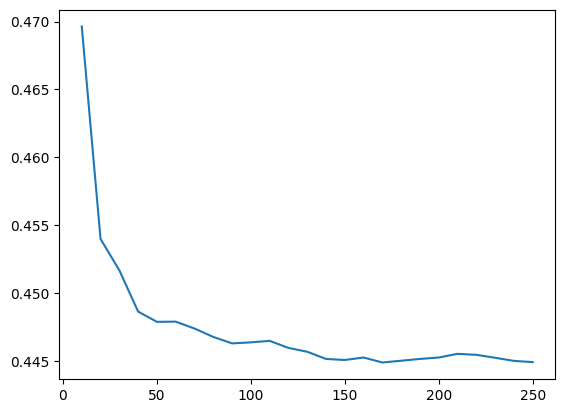

In [30]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10 [x]
* 15
* 20
* 25

In [31]:
scores = []

for d in [10, 15, 20, 25]:
    depth_scores = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=d,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_rf_predict = rf.predict(X_val)
        score = root_mean_squared_error(y_val, y_rf_predict)
        depth_scores.append(score)
    scores.append((d, np.mean(depth_scores)))

df_scores = pd.DataFrame(scores, columns=['depth', 'rmse'])

In [34]:
df_scores.sort_values(by='rmse', ascending=True)

,depth,rmse
0,10,0.445555
1,15,0.447824
2,20,0.447884
3,25,0.448156


## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight` [x]
*	`horsepower`
* `acceleration`
* `engine_displacement`	

In [43]:
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
fi_df = pd.DataFrame(zip( dv.get_feature_names_out(), rf.feature_importances_), columns=['feature_name', 'score'])

In [53]:
fi_df[fi_df['feature_name'].isin(['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement'])].sort_values(by='score', ascending=False)

,feature_name,score
13,vehicle_weight,0.961395
6,horsepower,0.015059
0,acceleration,0.010919
3,engine_displacement,0.003143


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1 [x]
* Both give equal value

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw06
* If your answer doesn't match options exactly, select the closest one. If the answer is exactly in between two options, select the higher value.

In [54]:
import xgboost as xgb

features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [56]:
scores = []
for eta in [0.3, 0.1]:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=100,
        verbose_eval=5,
        evals=watchlist
    )
    y_predict = model.predict(dval)
    score = root_mean_squared_error(y_val, y_predict)
    scores.append((eta, score))

xgb_df = pd.DataFrame(scores, columns=['eta', 'score'])
xgb_df

[0]	train-rmse:1.84404	val-rmse:1.82931
[5]	train-rmse:0.51605	val-rmse:0.54696
[10]	train-rmse:0.37405	val-rmse:0.43873
[15]	train-rmse:0.34977	val-rmse:0.43544
[20]	train-rmse:0.33639	val-rmse:0.43650
[25]	train-rmse:0.32641	val-rmse:0.43912
[30]	train-rmse:0.31602	val-rmse:0.44097
[35]	train-rmse:0.30767	val-rmse:0.44281
[40]	train-rmse:0.29554	val-rmse:0.44541
[45]	train-rmse:0.28553	val-rmse:0.44711
[50]	train-rmse:0.27888	val-rmse:0.44715
[55]	train-rmse:0.26987	val-rmse:0.44886
[60]	train-rmse:0.26515	val-rmse:0.45011
[65]	train-rmse:0.25856	val-rmse:0.45068
[70]	train-rmse:0.25060	val-rmse:0.45151
[75]	train-rmse:0.24115	val-rmse:0.45338
[80]	train-rmse:0.23638	val-rmse:0.45406
[85]	train-rmse:0.22994	val-rmse:0.45456
[90]	train-rmse:0.22270	val-rmse:0.45629
[95]	train-rmse:0.21546	val-rmse:0.45685
[99]	train-rmse:0.20830	val-rmse:0.45812
[0]	train-rmse:2.32882	val-rmse:2.30796
[5]	train-rmse:1.43418	val-rmse:1.42630
[10]	train-rmse:0.92140	val-rmse:0.92737
[15]	train-rmse:0.63

,eta,score
0,0.3,0.458119
1,0.1,0.430383
